In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concat_aseg_dkt import concat_aseg_dkt
from visualization_hcp_d import map_yeo

In [10]:
# loading in dfs
no_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/noconf_aseg/linreg_noconf_aseg.csv",
                          "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/noconf_dkt/linreg_noconf_dkt.csv")

all_noSite_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/allconf_noSite_aseg/linreg_allconf_noSite_aseg.csv",
                                  "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/allconf_noSite_dkt/linreg_allconf_noSite_dkt.csv")

age_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/ageconf_aseg/linreg_ageconf_aseg.csv",
                           "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/ageconf_dkt/linreg_ageconf_dkt.csv")

hm_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/hmconf_aseg/linreg_hmconf_aseg.csv",
                          "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/hmconf_dkt/linreg_hmconf_dkt.csv")

intraCranial_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/intracranialconf_aseg/linreg_intracranialconf_aseg.csv",
                                    "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/intracranialconf_dkt/linreg_intracranialconf_dkt.csv")

sex_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/sexconf_aseg/linreg_sexconf_aseg.csv",
                           "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_D/sexconf_dkt/linreg_sexconf_dkt.csv")

# load dictionary 
dictionary = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/structural_dictionary.csv") # originally from "/scratch/l.lexi/WAPIAW2024/Source_Code/maps/structural_dictionary.csv" 


In [27]:
# function that overlaps a df with confound-regressed betas with no-confound regressed betas
def overlapped_hist(df_conf, df_name, phenotype=None, title=False, overlap=True, color="#f46d43"): 
    df = map_yeo(no_conf, dictionary)
    df = df[(df['regressor'] == 'IDP (feature)') | (df['regressor'] == 'IDP (dkt)')]
    
    df_conf = map_yeo(df_conf, dictionary)
    df_conf = df_conf[(df_conf['regressor'] == 'IDP (feature)')]
    
    groups = df["Yeo_name"].unique()
    
    if phenotype != None:
        df = df[(df['phenotype'] == phenotype)]
        df_conf = df_conf[(df_conf['phenotype'] == phenotype)]
        

    num_bins = 15
    bins = np.linspace(-0.2, 0.2, num_bins + 1)
    
    # Create a figure and axis for each group
    fig, axes = plt.subplots(nrows=1, ncols=len(groups), figsize=(8 * len(groups), 10))


    # Plot histograms for each group
    for ax, group in zip(axes, groups):
        df_group_data = df[df['Yeo_name'] == group]['coef_']
        df_conf_group_data = df_conf[df_conf['Yeo_name'] == group]['coef_']
        
        if overlap:
            ax.hist(df_group_data, bins=bins, alpha=0.50, color = "#4575b4")
        
        ax.hist(df_conf_group_data, bins=bins, alpha=0.5, color=color)

        if title:
            ax.set_title(f'{group}', fontsize=55, fontweight='bold')
            
        if group == "Visual":
            ax.set_ylabel(df_name, fontsize=55, fontweight='bold')
            
        ax.set_xlabel('Coefficient')
        ax.set_xlim(-0.20, 0.2)
        ax.set_ylim(0, 40)

    plt.tight_layout()
    plt.show()

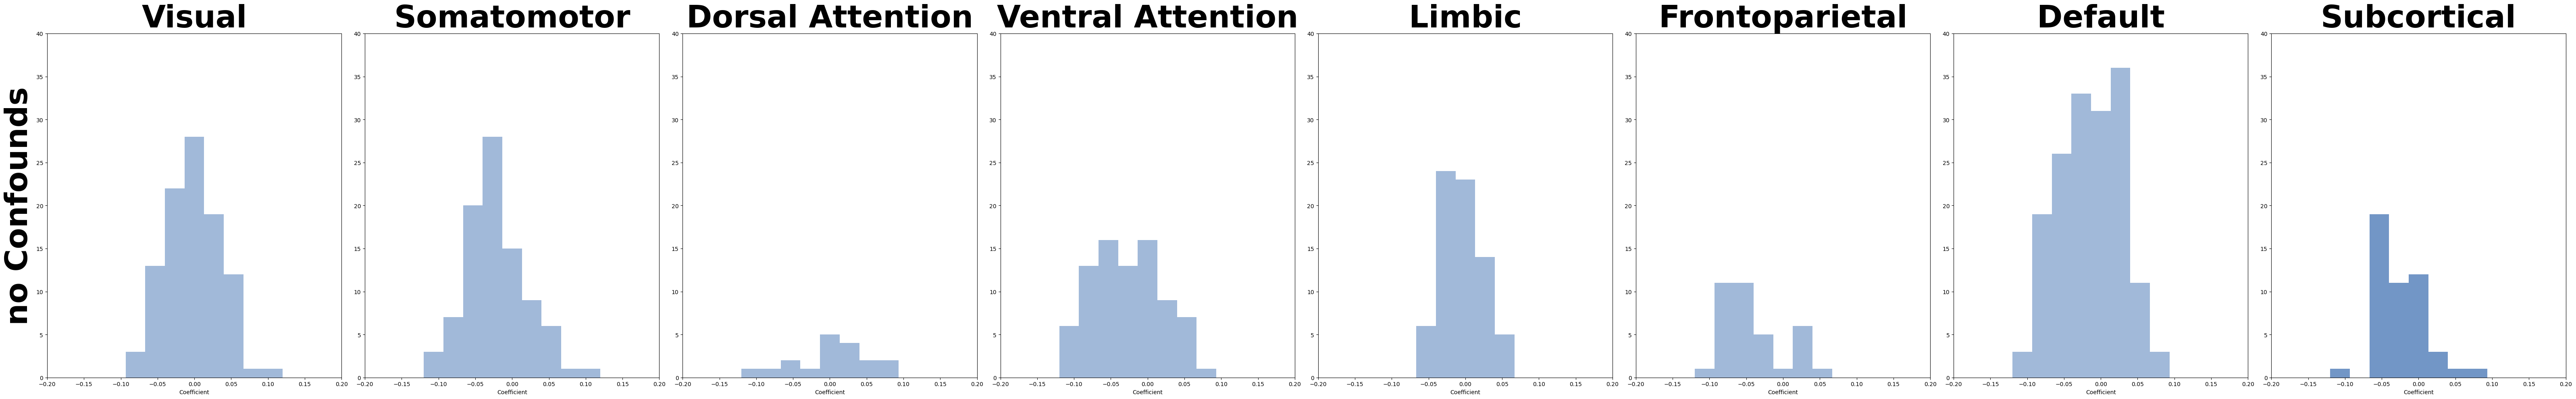

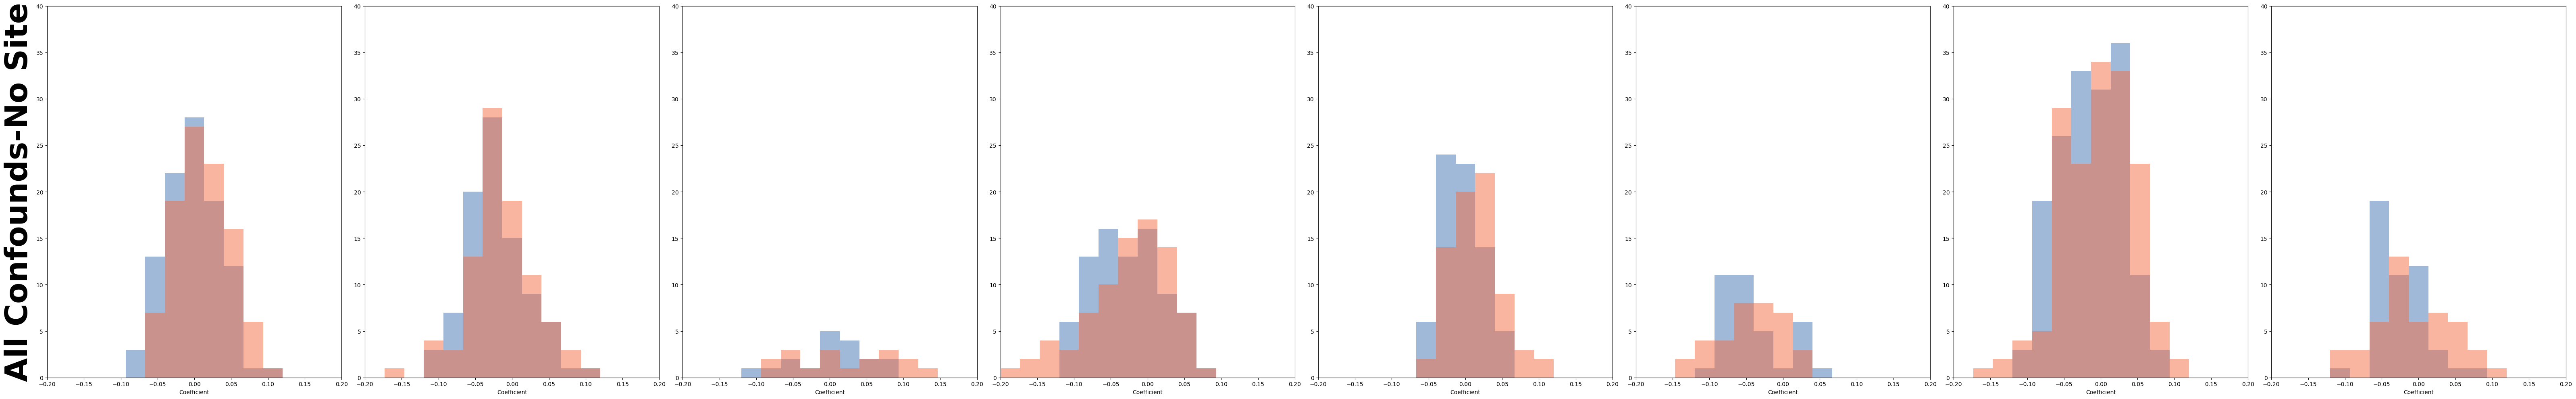

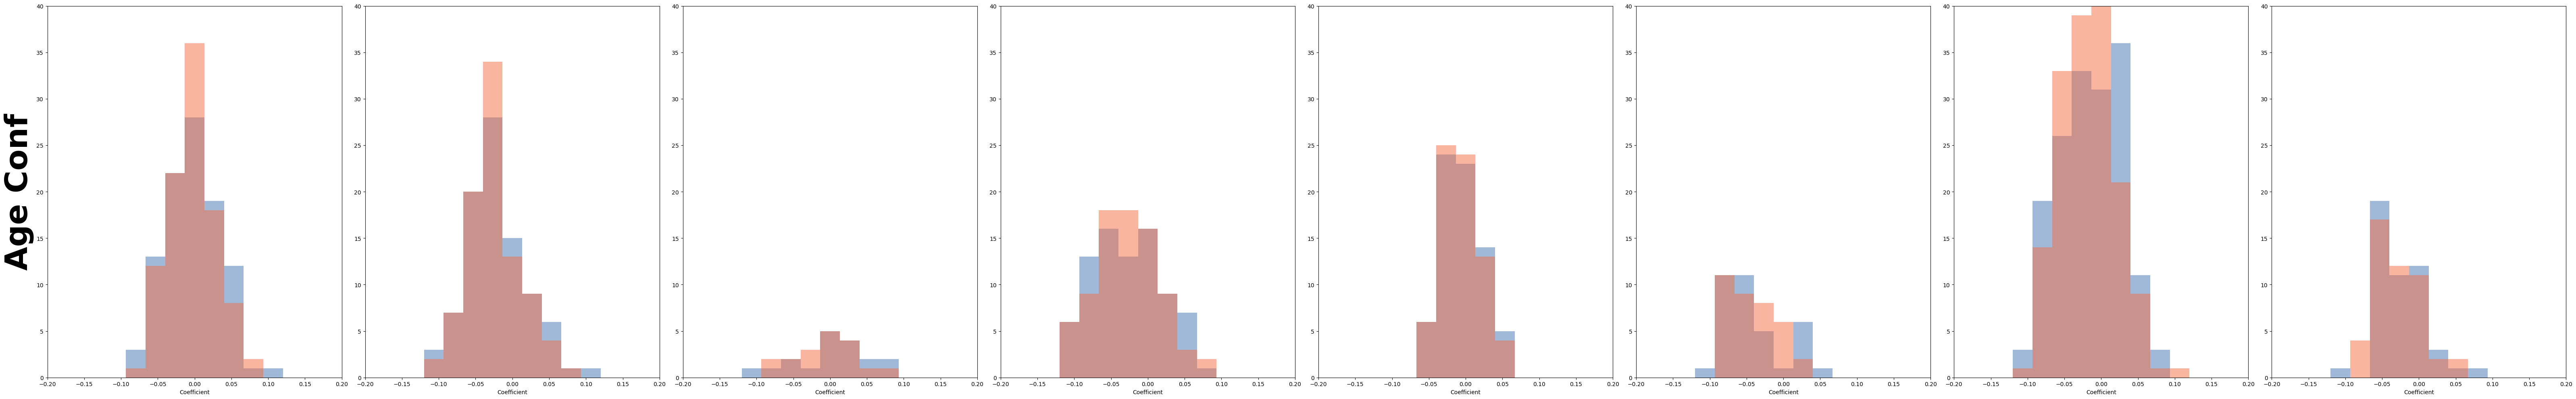

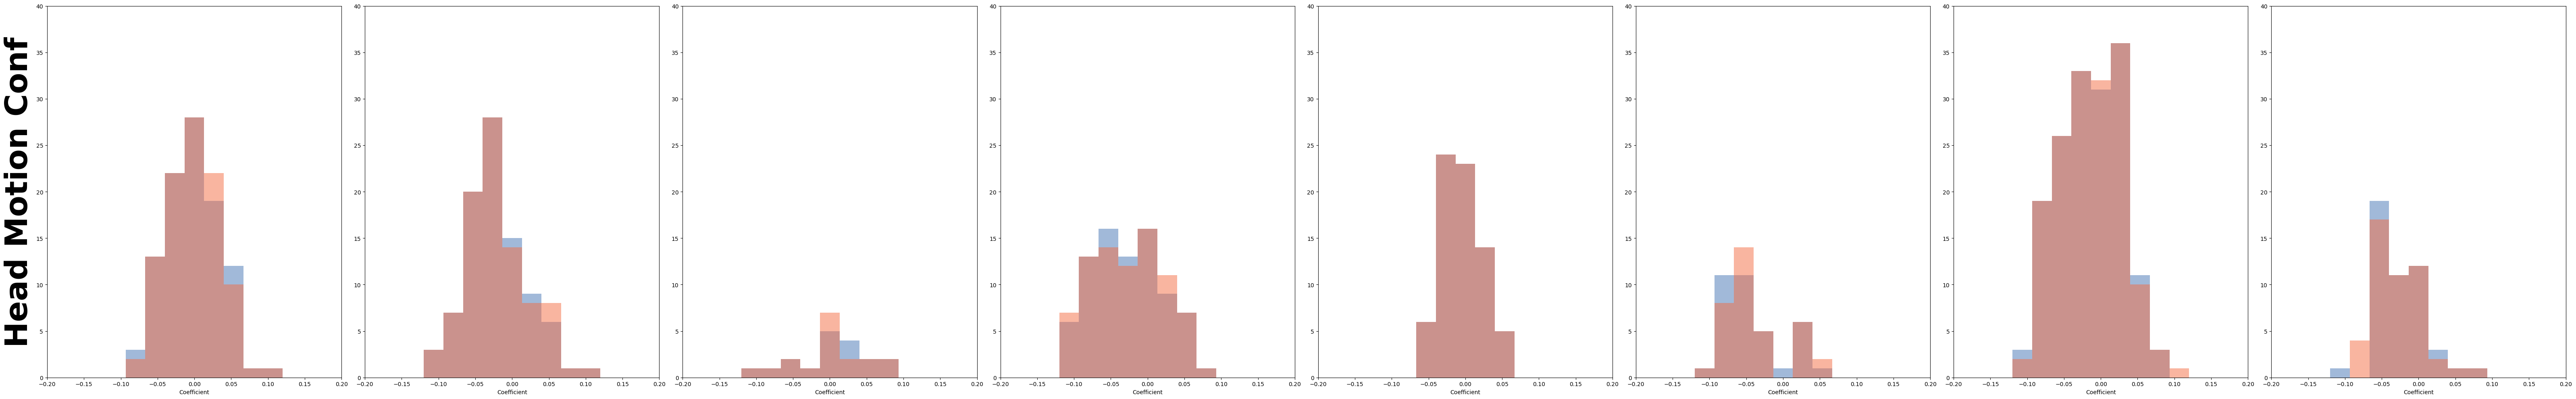

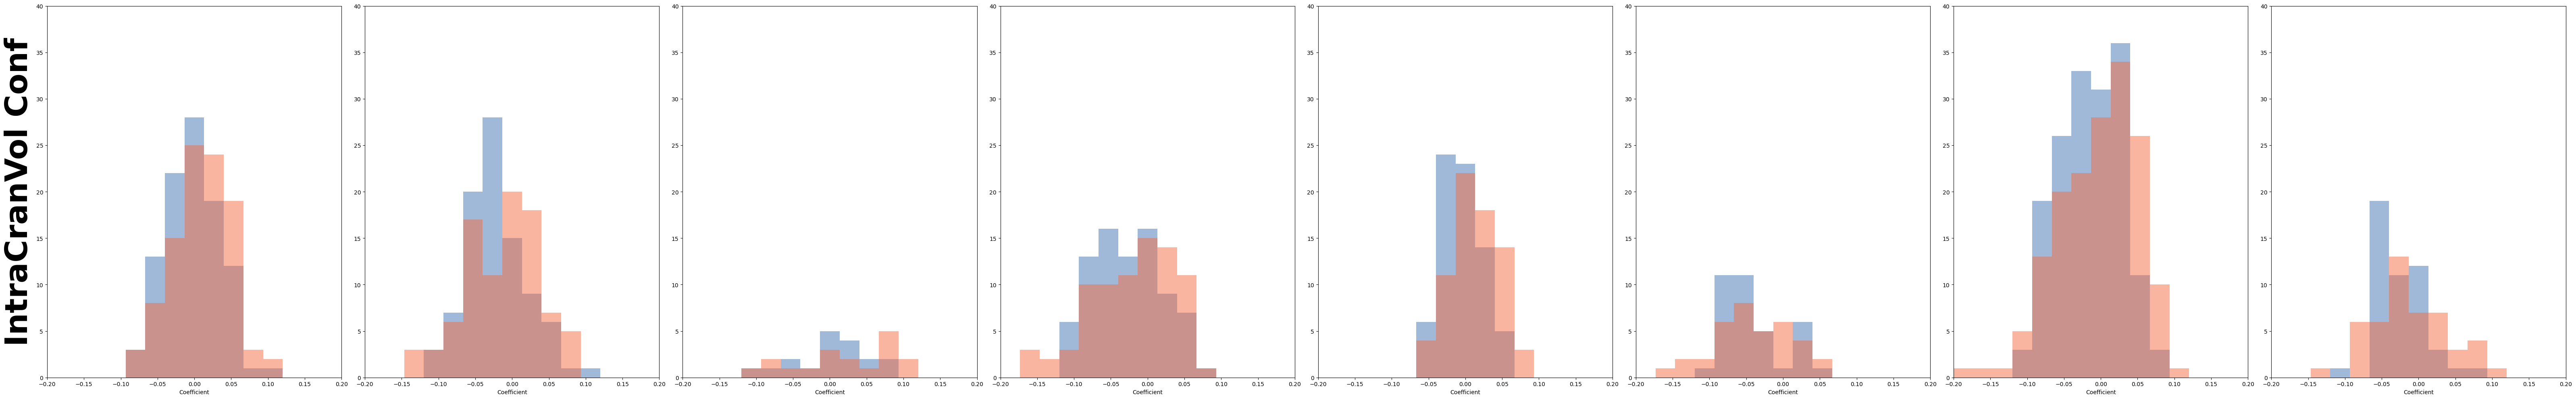

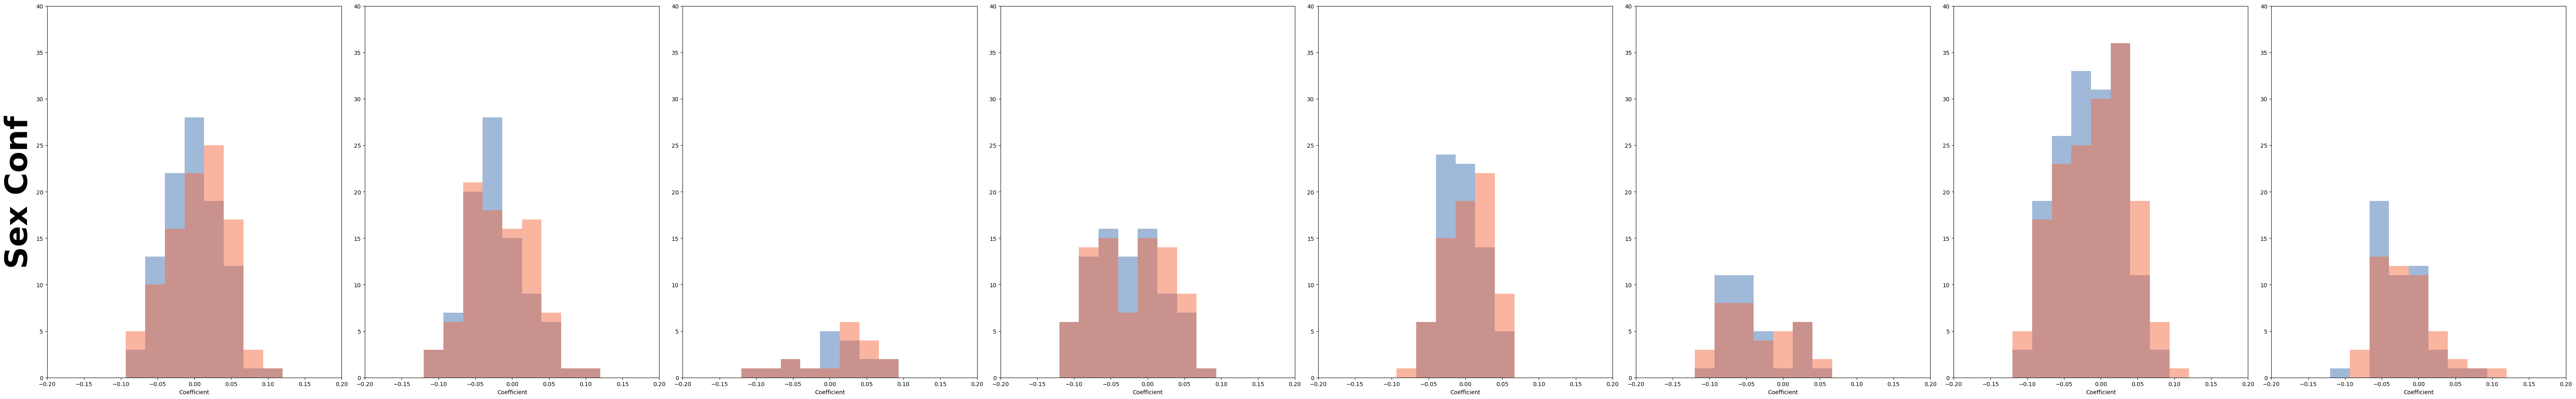

In [28]:
overlapped_hist(no_conf, "no Confounds", title=True, overlap=True, color="#4575b4")
overlapped_hist(all_noSite_conf, "All Confounds-No Site")
overlapped_hist(age_conf, "Age Conf")
overlapped_hist(hm_conf, "Head Motion Conf")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf")
overlapped_hist(sex_conf, "Sex Conf")

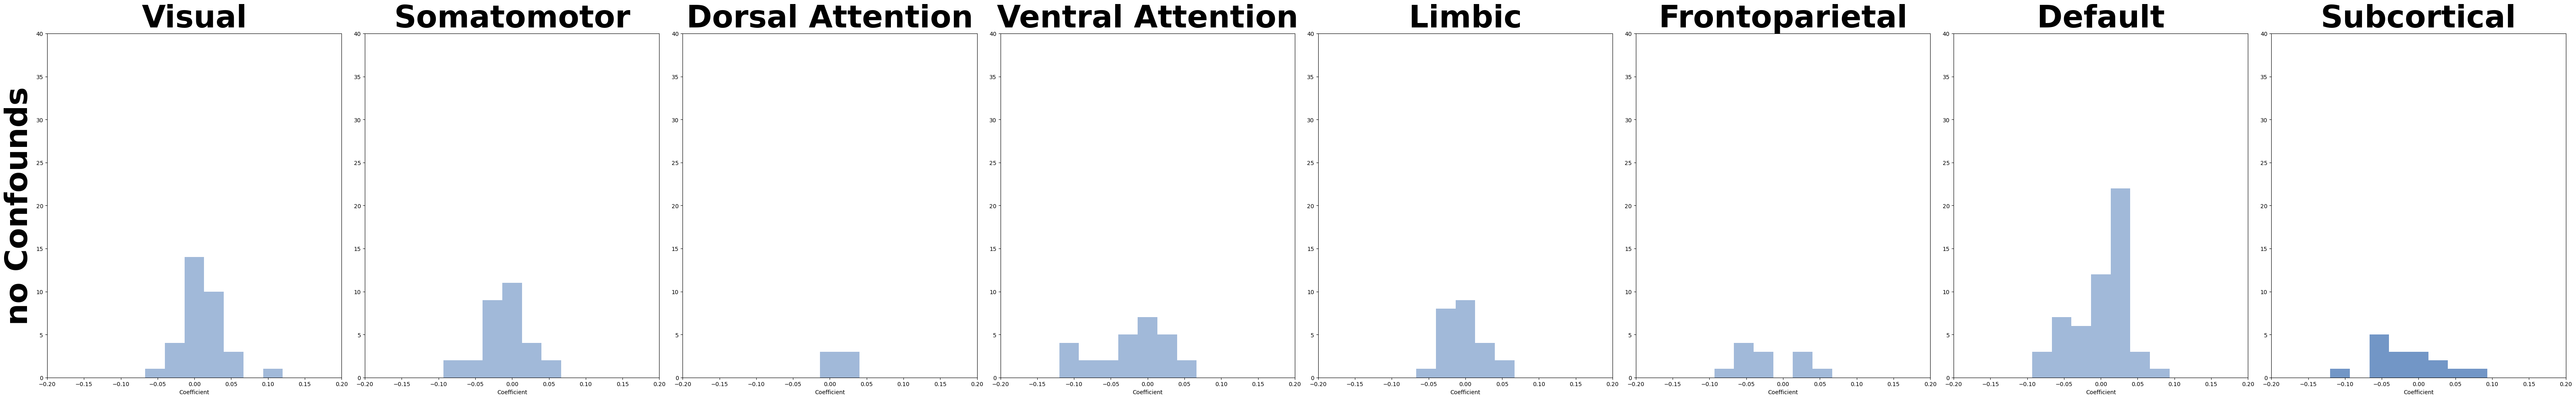

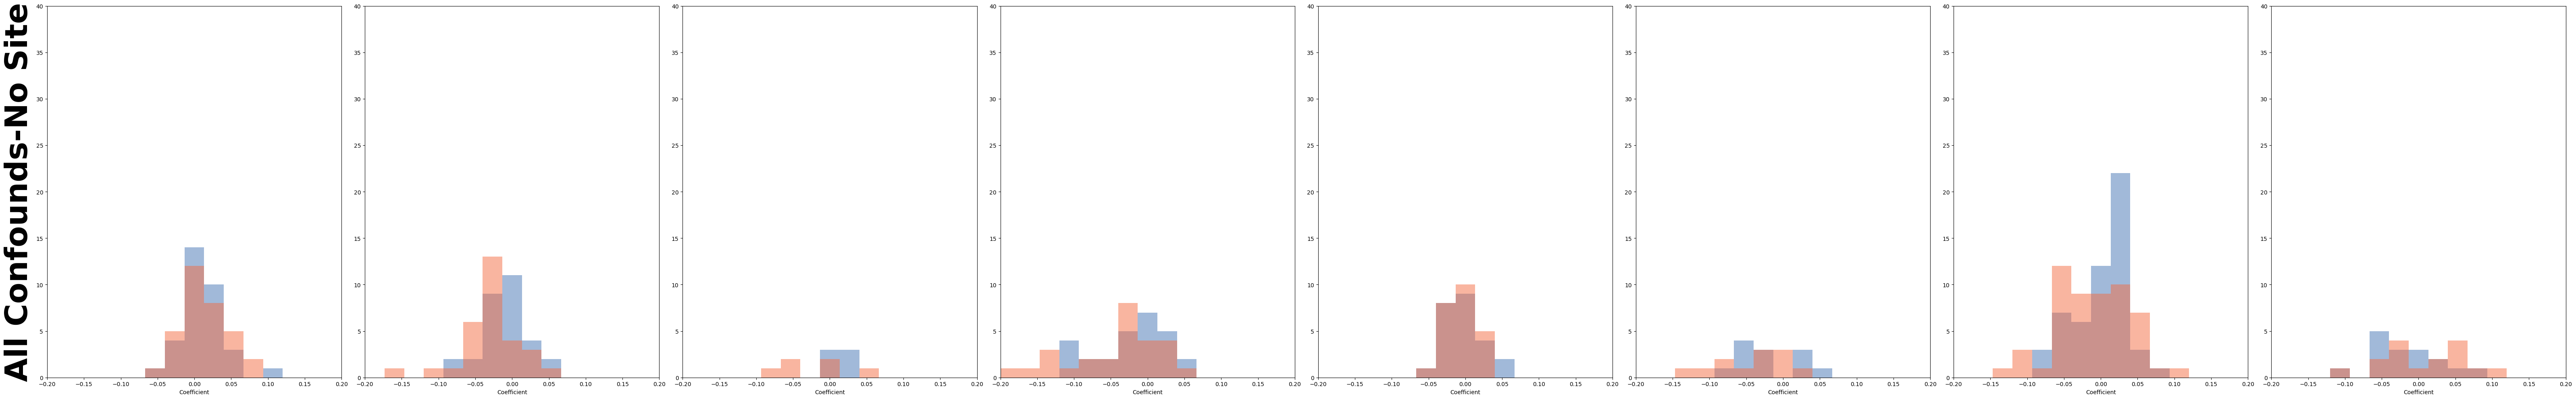

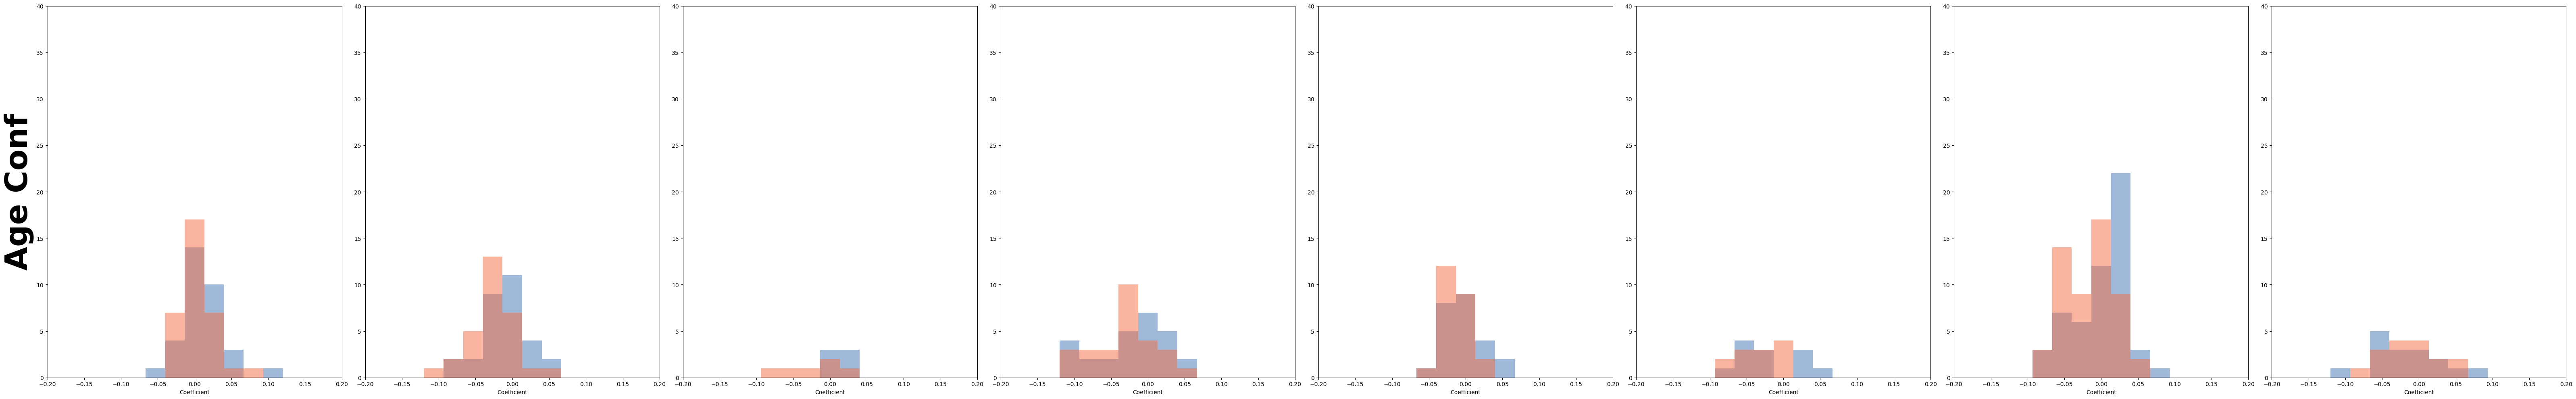

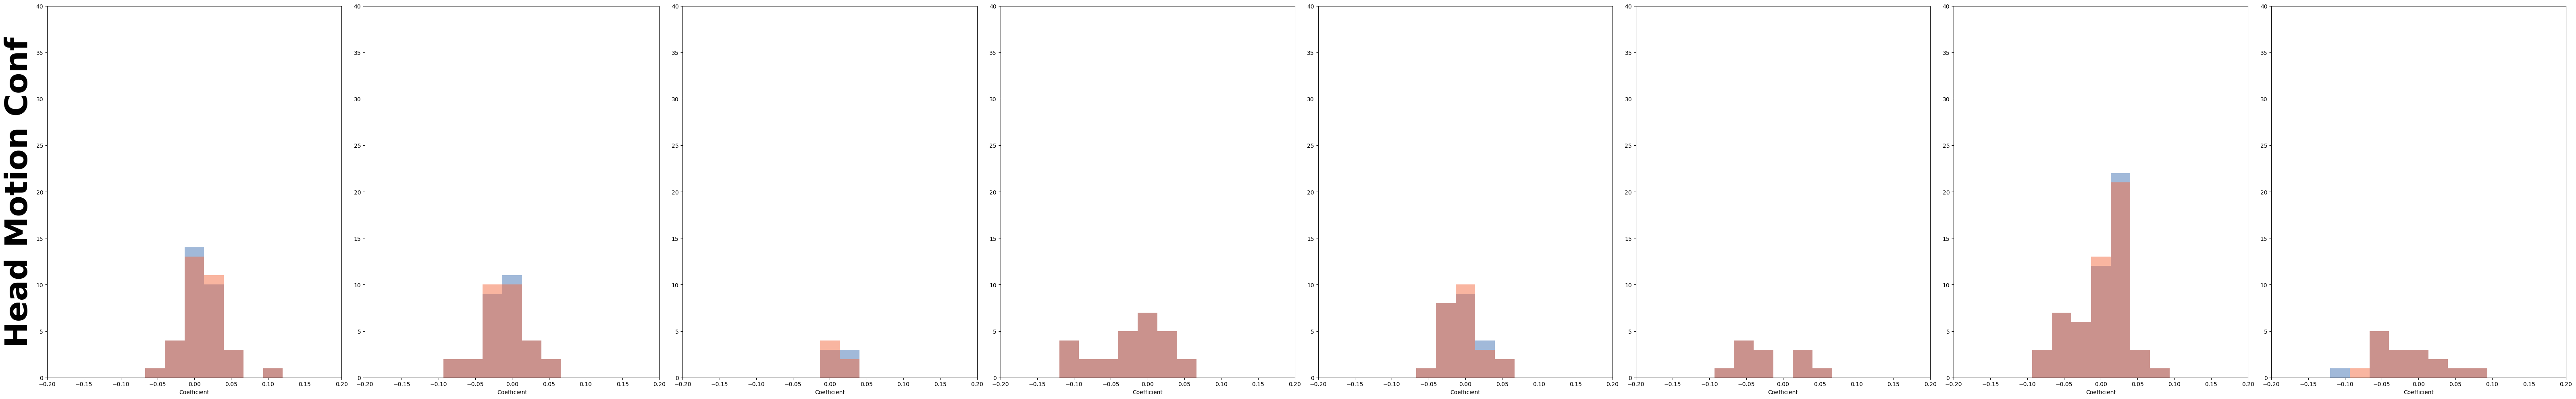

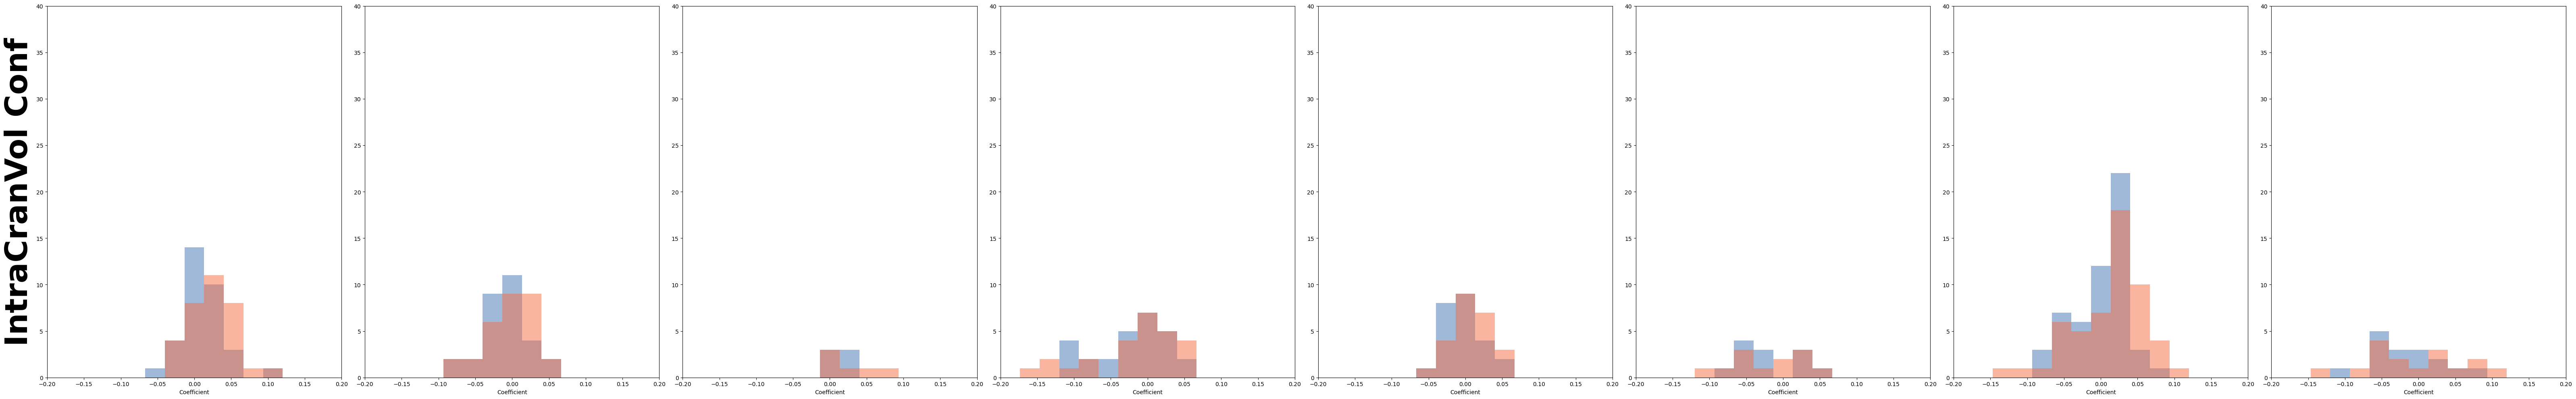

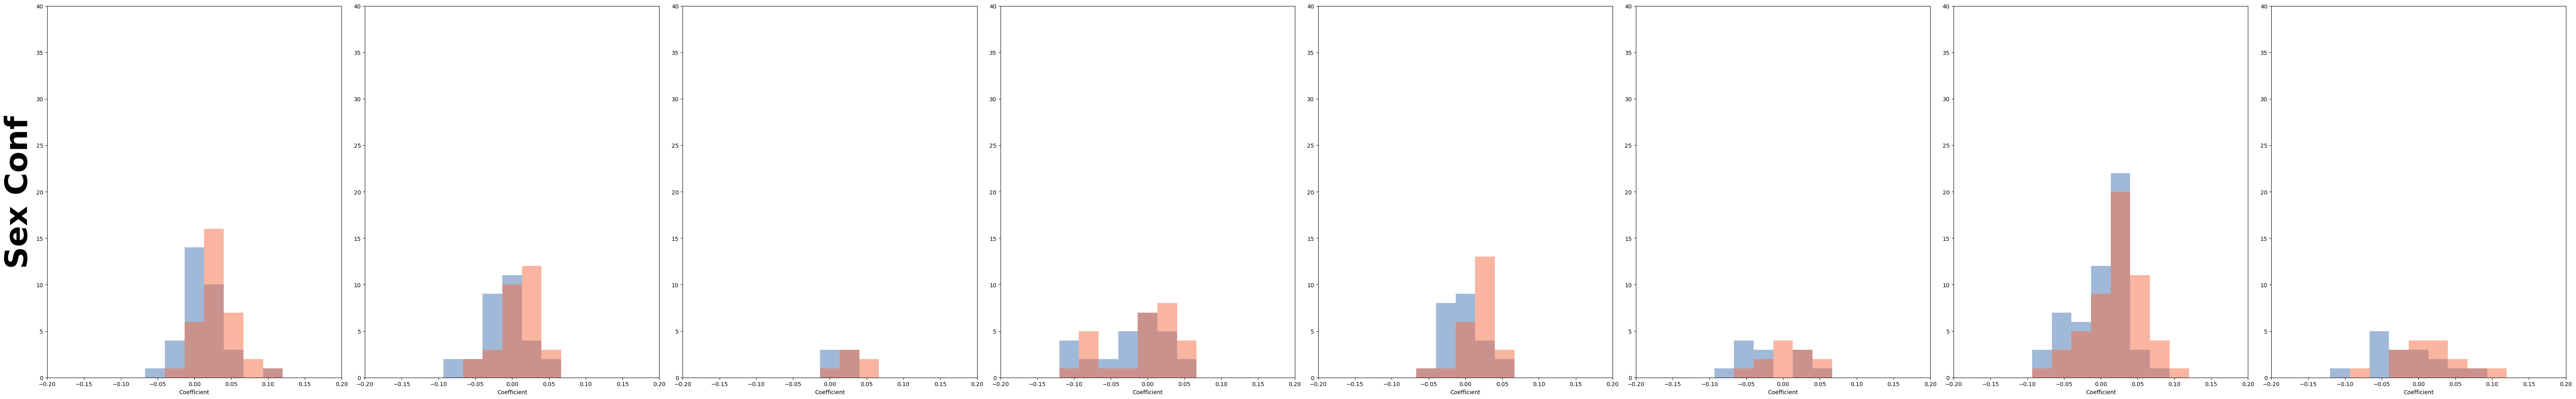

In [29]:
overlapped_hist(no_conf, "no Confounds", title=True, overlap=True, color="#4575b4", phenotype="cbcl_anx_dep")
overlapped_hist(all_noSite_conf, "All Confounds-No Site", phenotype="cbcl_anx_dep")
overlapped_hist(age_conf, "Age Conf", phenotype="cbcl_anx_dep")
overlapped_hist(hm_conf, "Head Motion Conf", phenotype="cbcl_anx_dep")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf", phenotype="cbcl_anx_dep")
overlapped_hist(sex_conf, "Sex Conf", phenotype="cbcl_anx_dep")

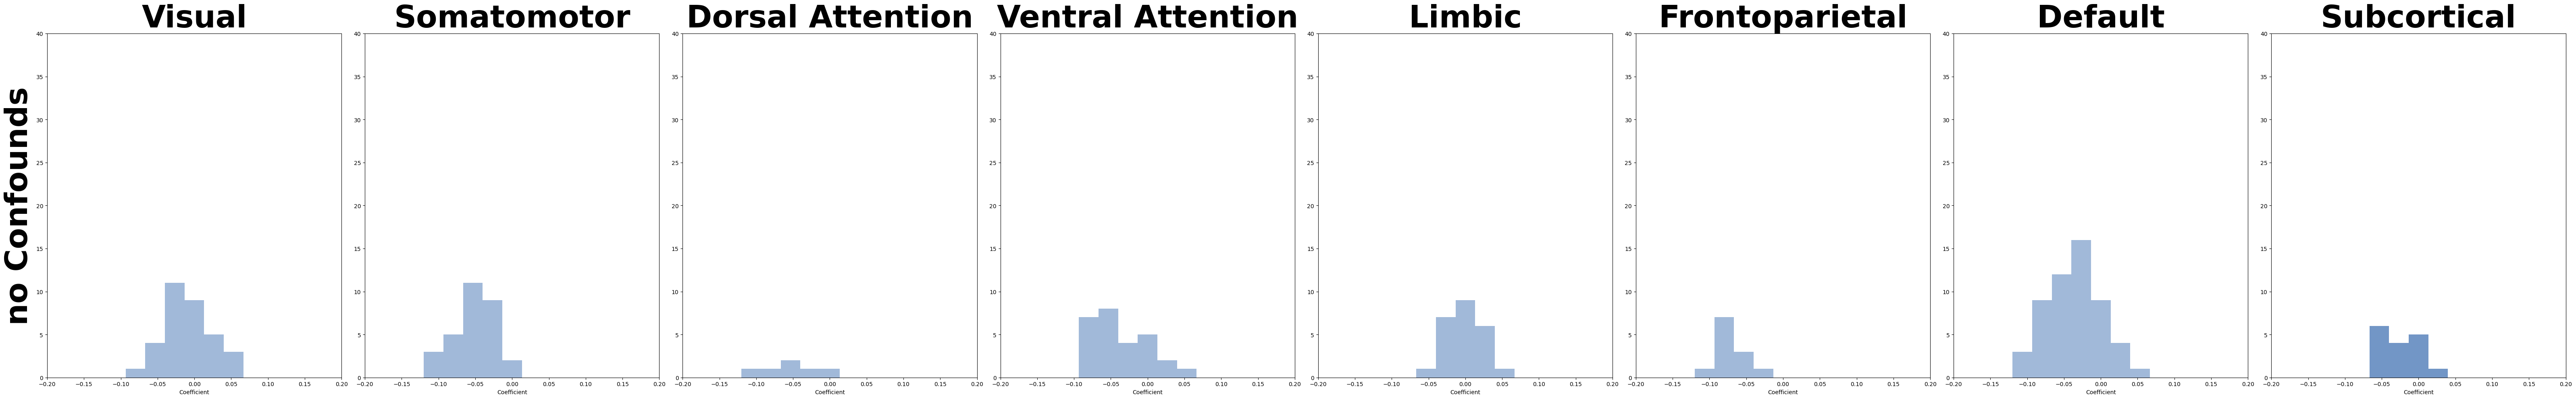

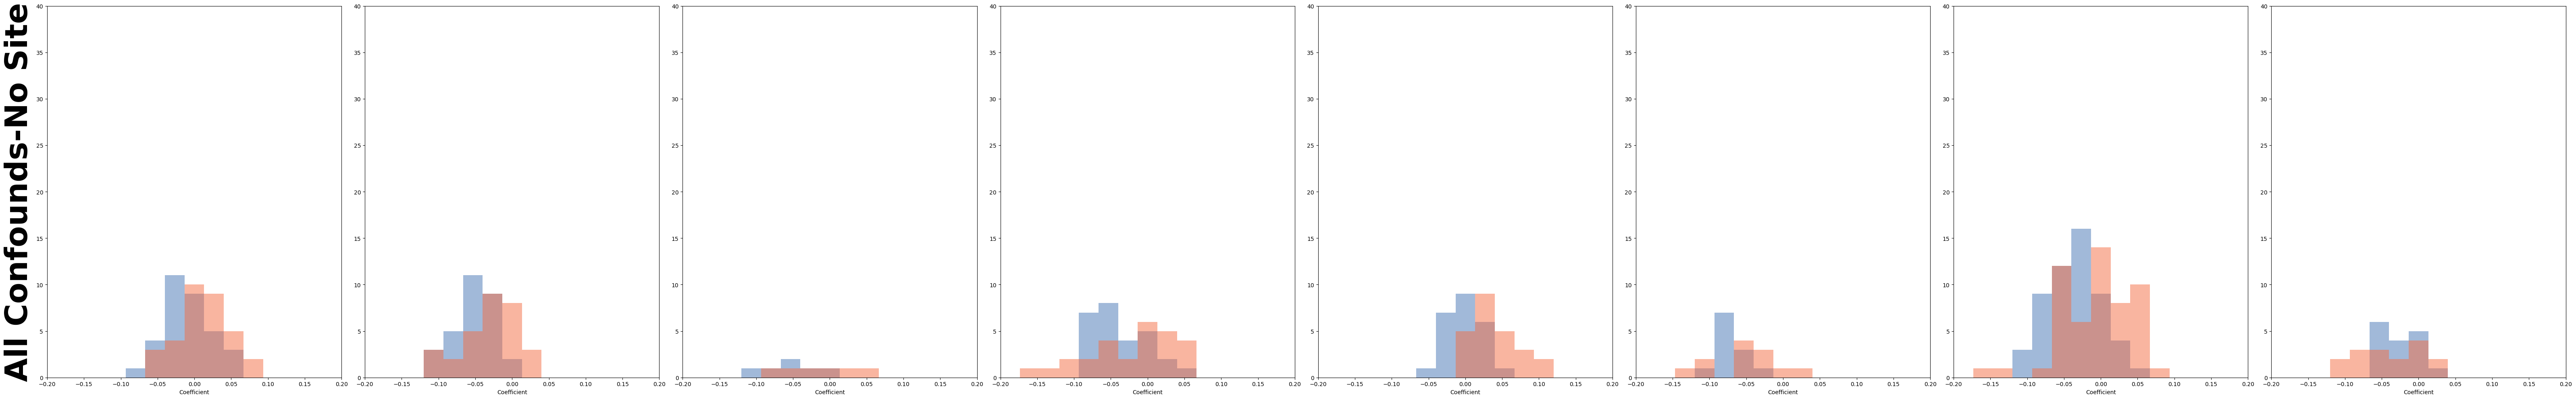

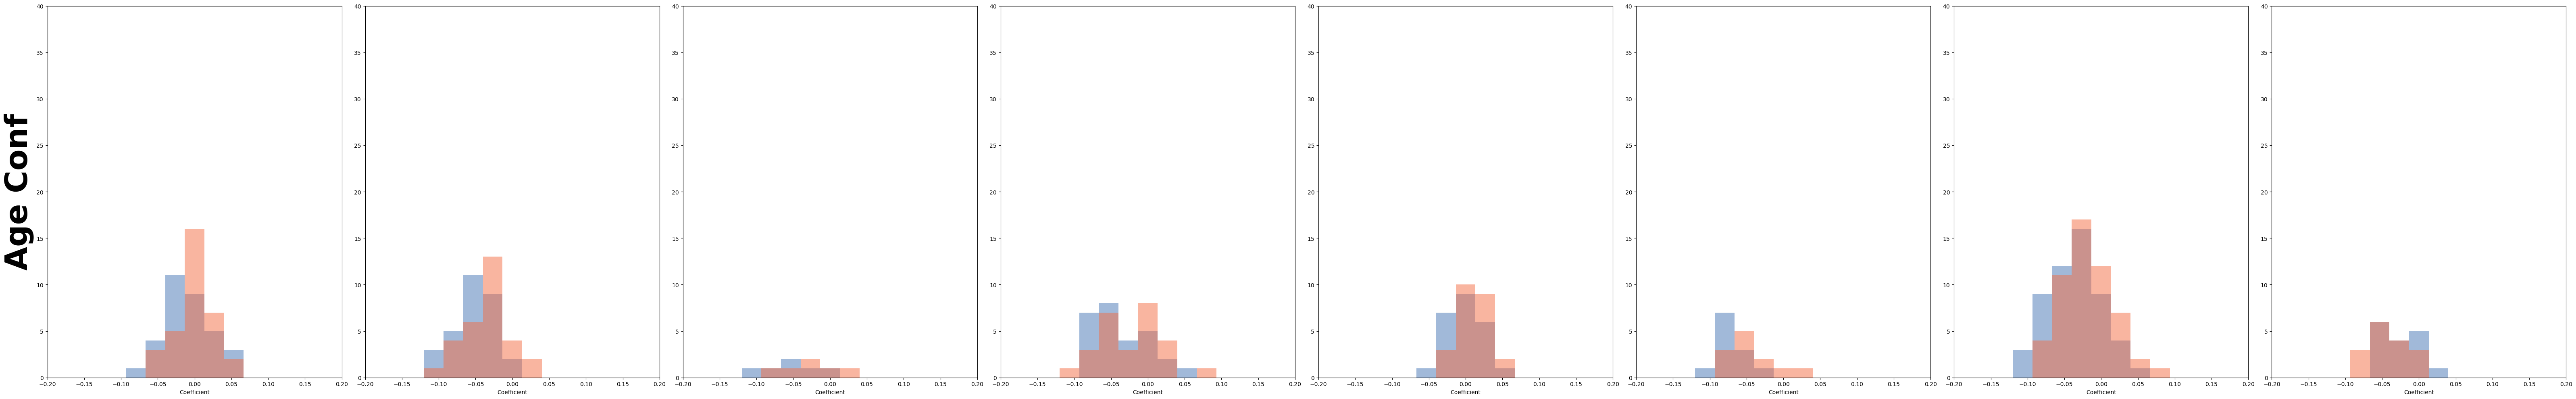

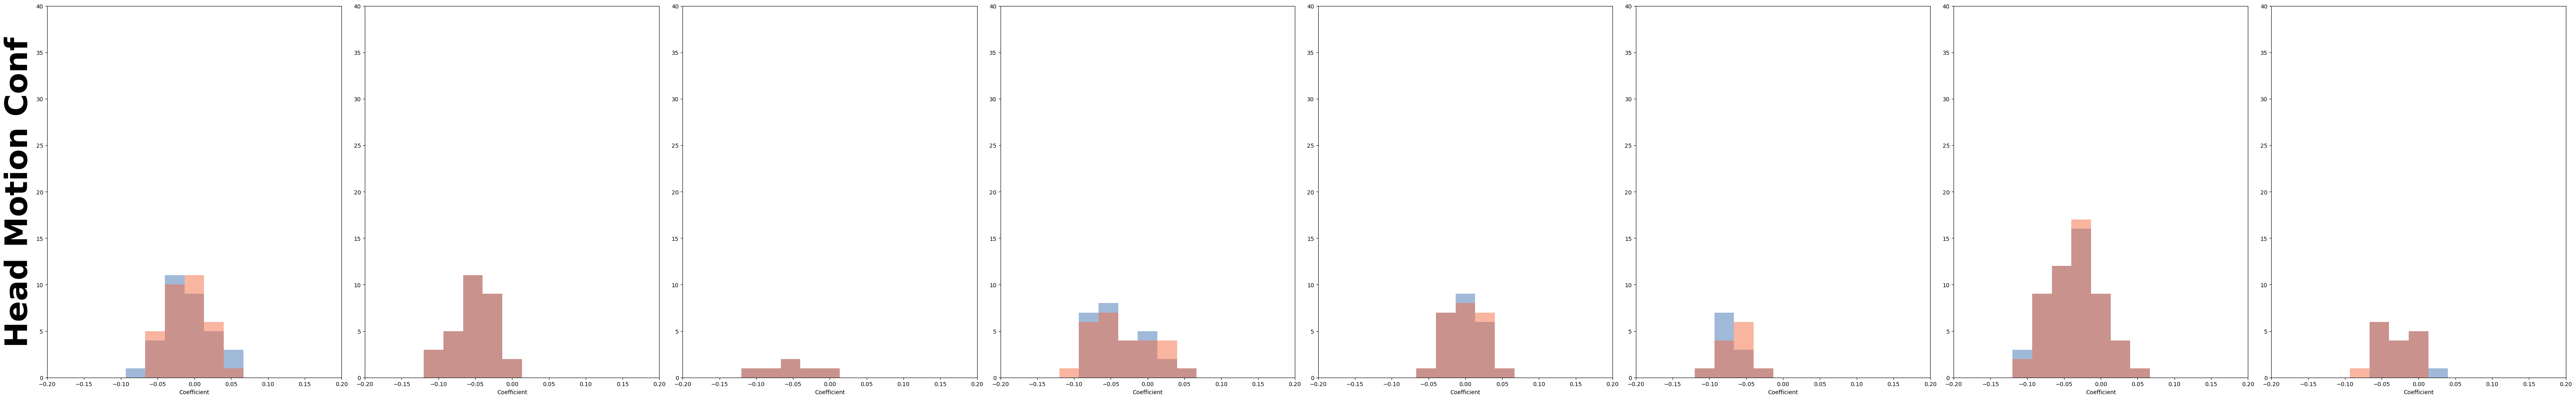

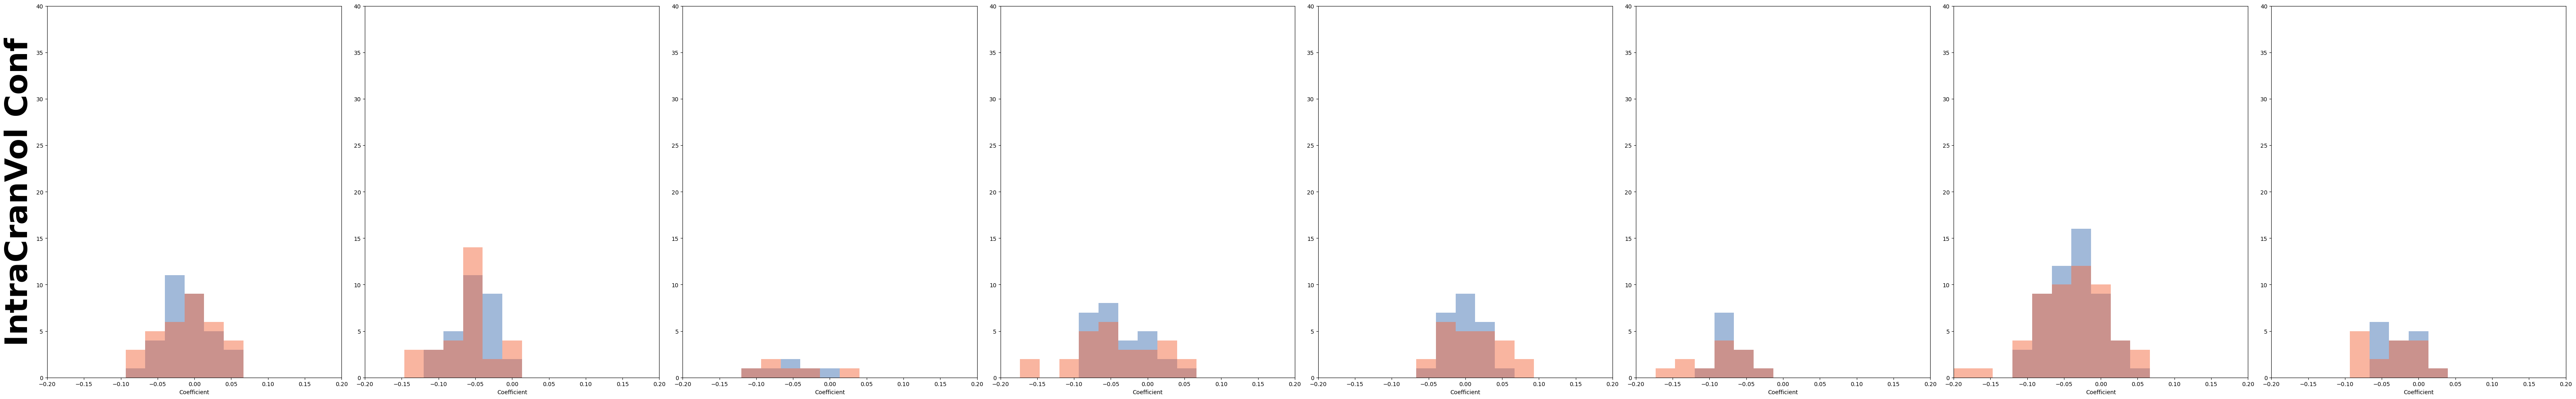

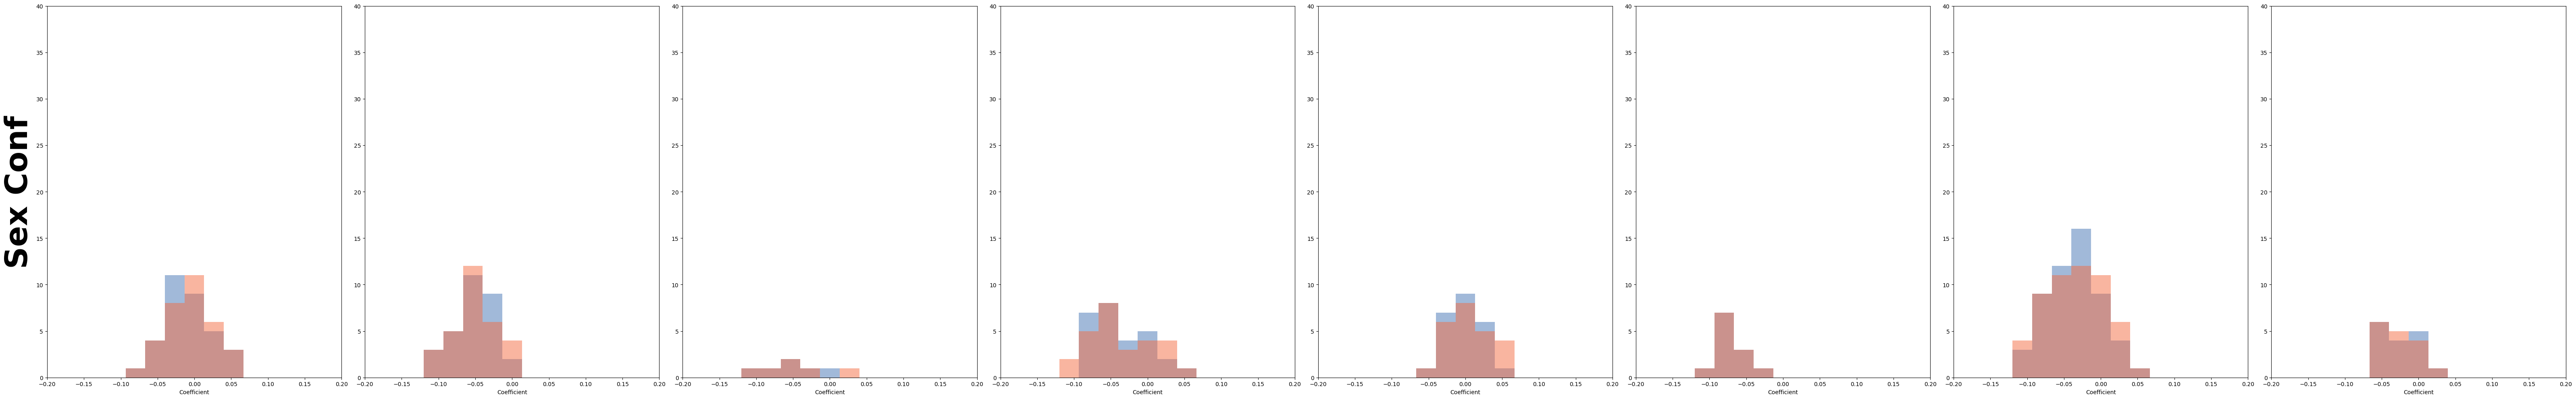

In [30]:
overlapped_hist(no_conf, "no Confounds", title=True, overlap=True, color="#4575b4", phenotype="dsm5_scale1")
overlapped_hist(all_noSite_conf, "All Confounds-No Site", phenotype="dsm5_scale1")
overlapped_hist(age_conf, "Age Conf", phenotype="dsm5_scale1")
overlapped_hist(hm_conf, "Head Motion Conf", phenotype="dsm5_scale1")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf", phenotype="dsm5_scale1")
overlapped_hist(sex_conf, "Sex Conf", phenotype="dsm5_scale1")

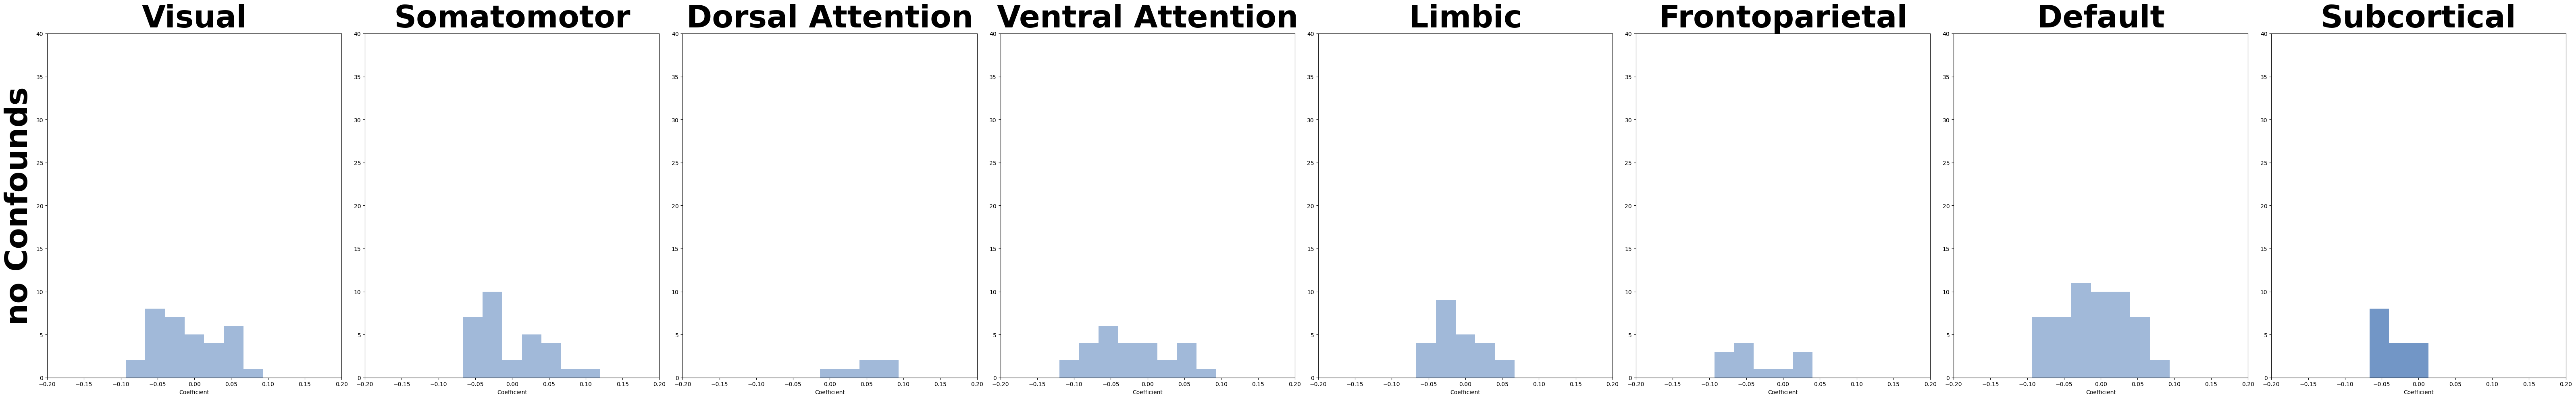

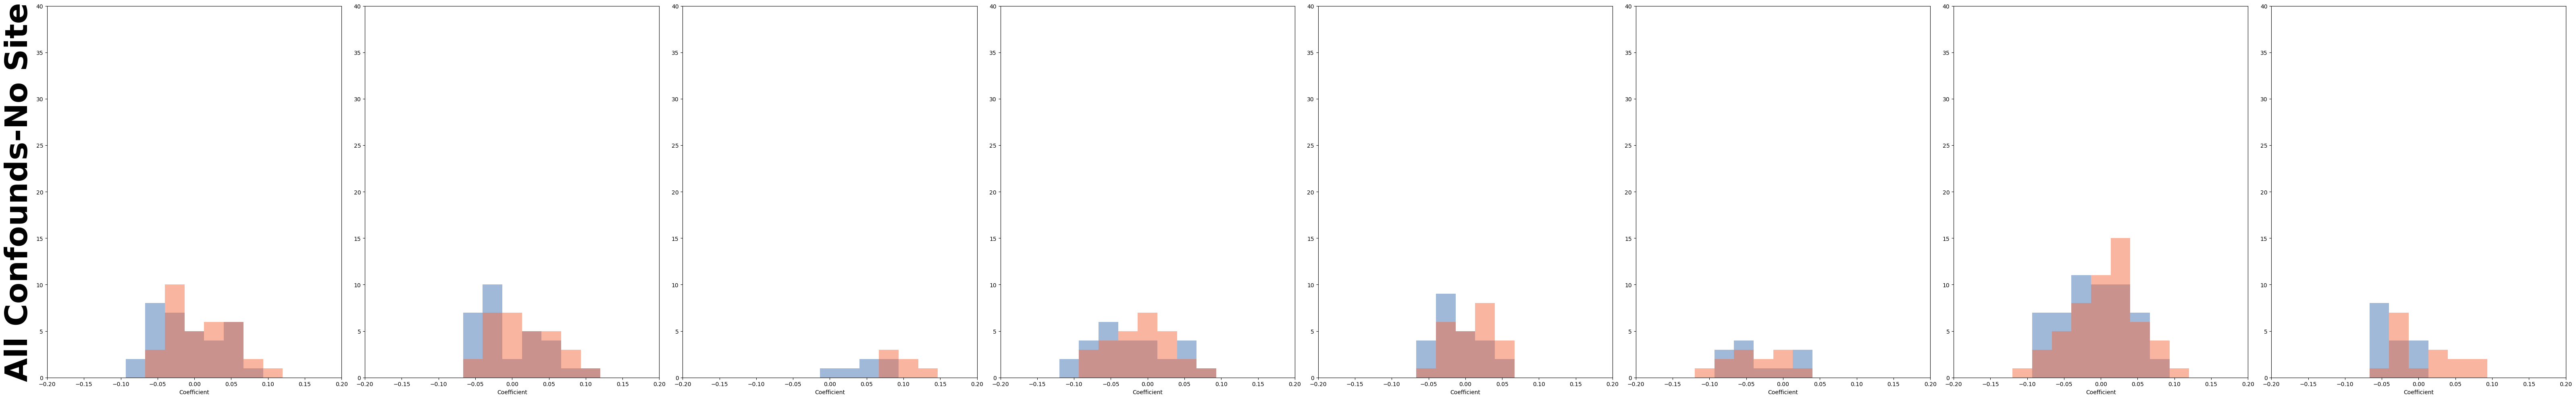

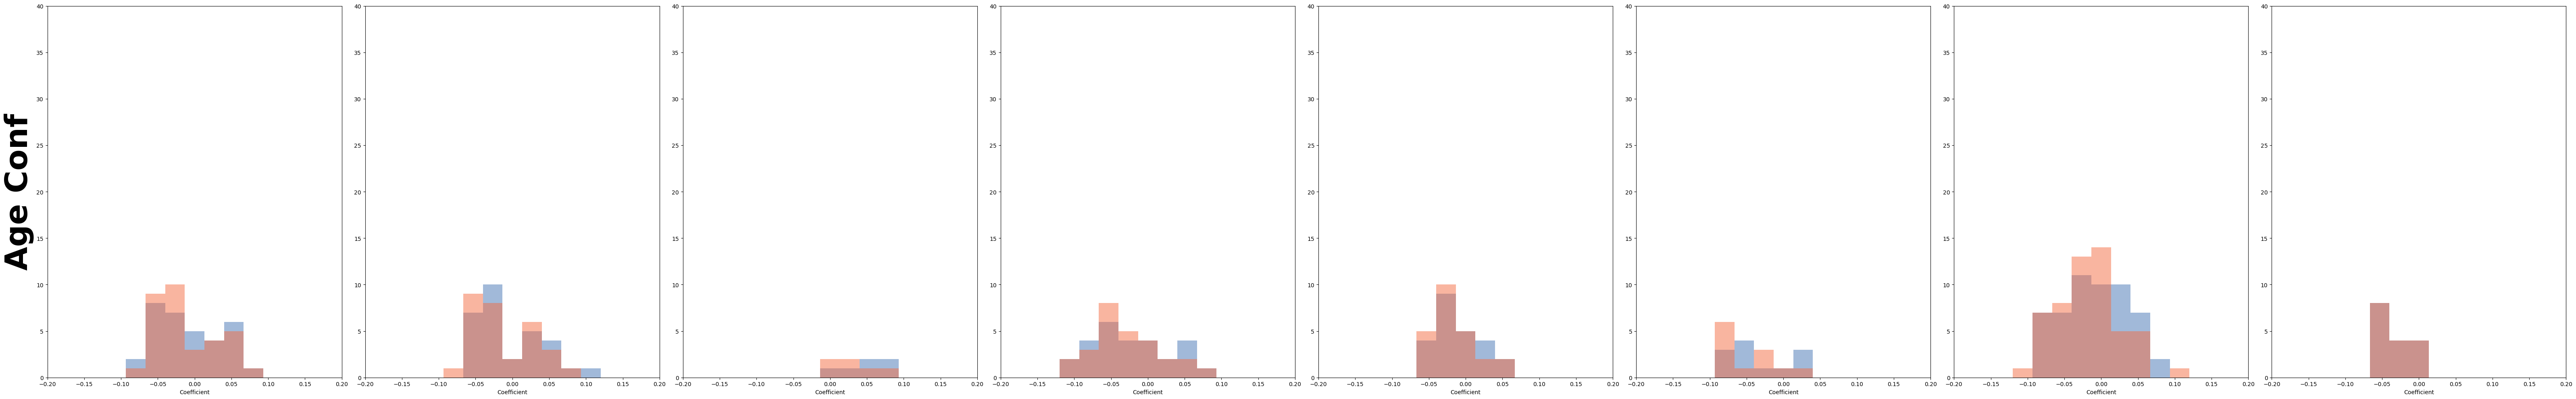

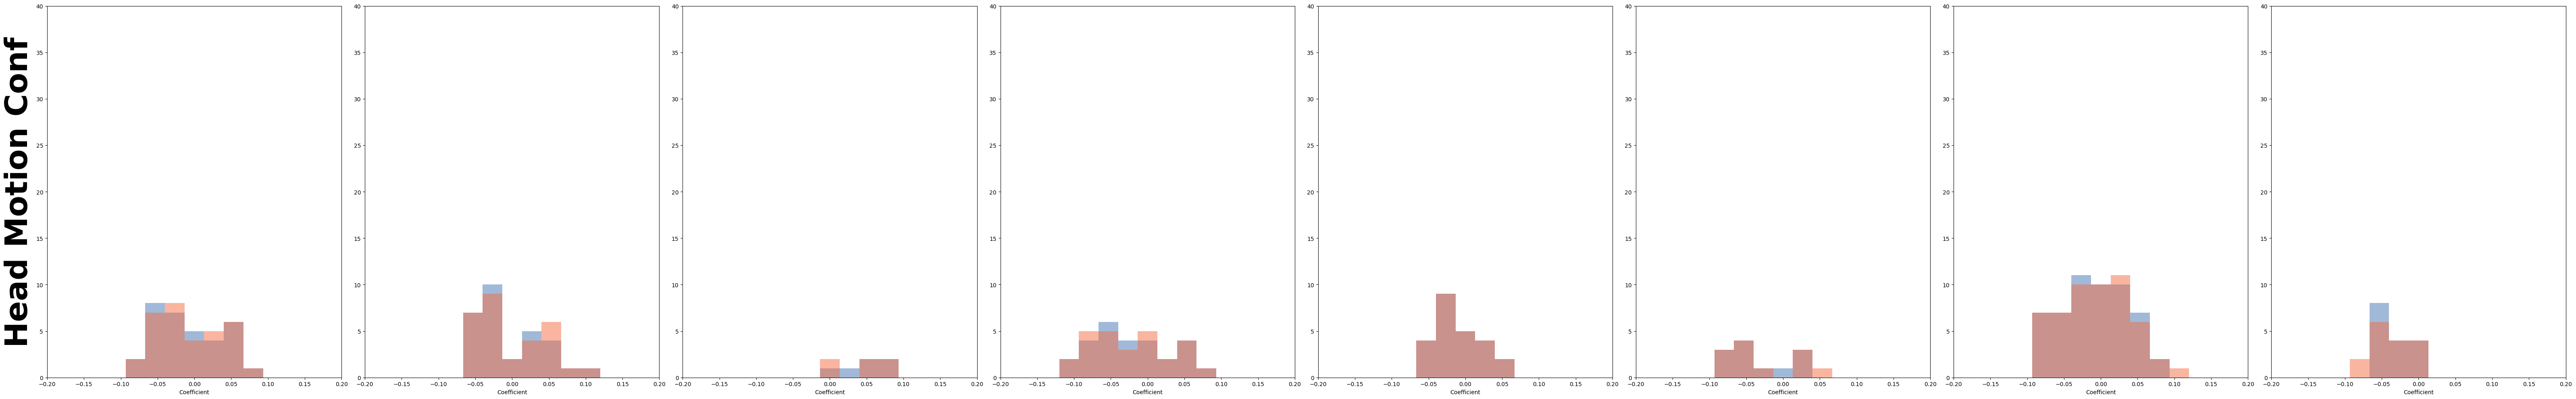

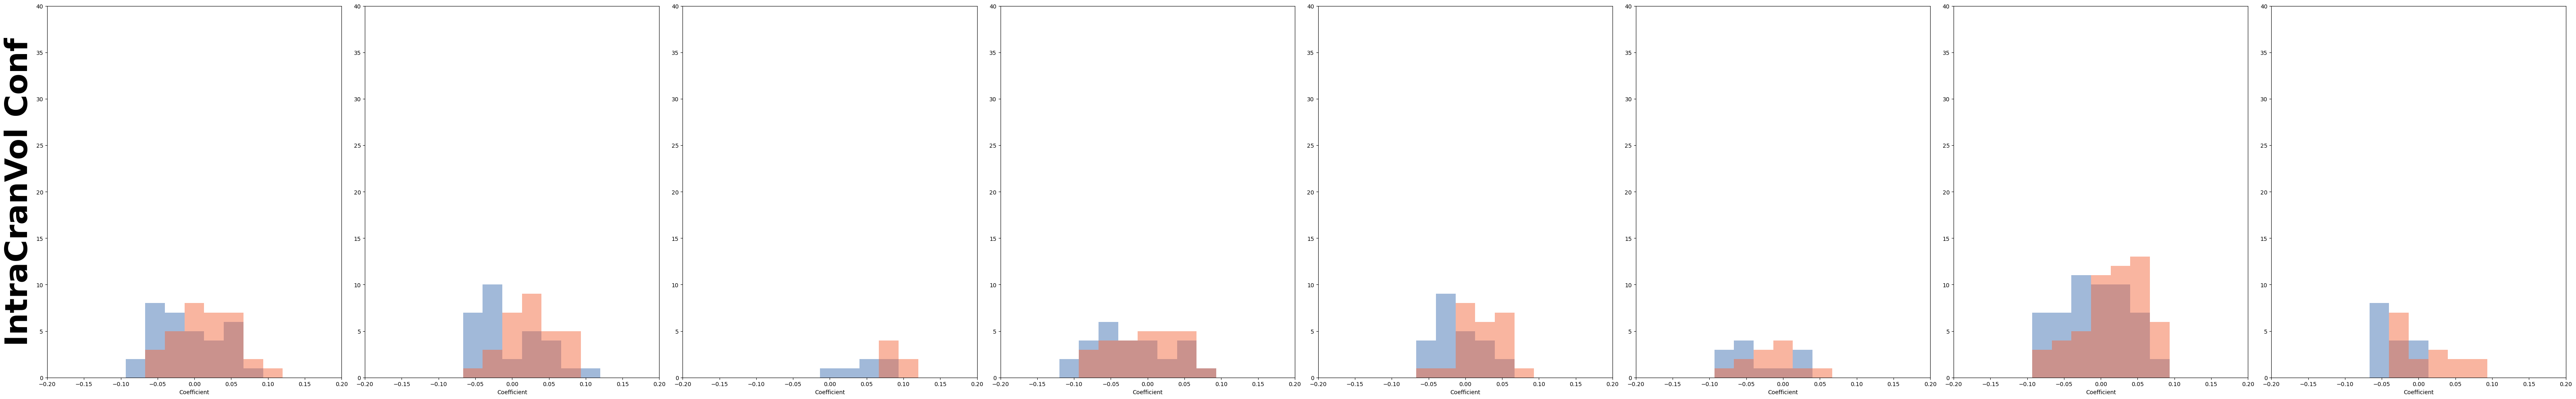

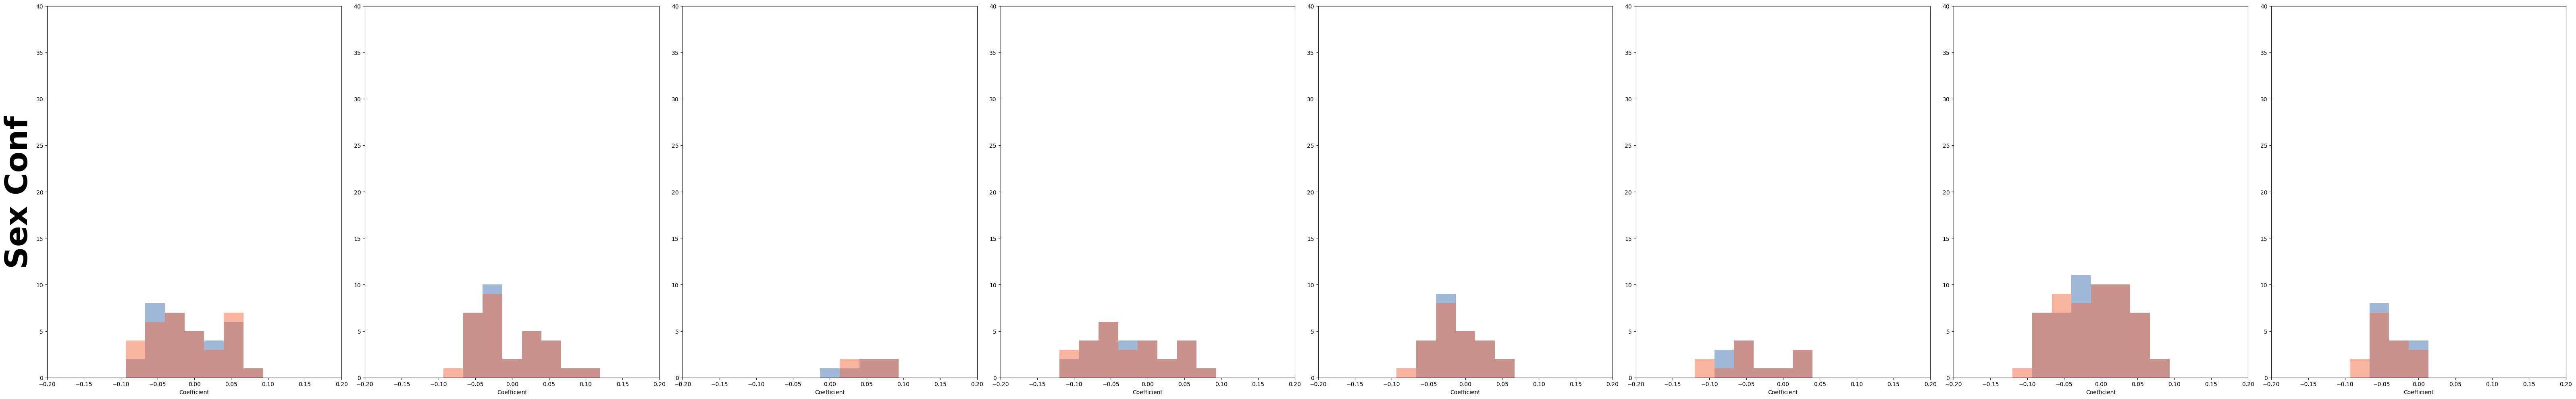

In [31]:
overlapped_hist(no_conf, "no Confounds", title=True, overlap=True, color="#4575b4", phenotype="upps_neg")
overlapped_hist(all_noSite_conf, "All Confounds-No Site", phenotype="upps_neg")
overlapped_hist(age_conf, "Age Conf", phenotype="upps_neg")
overlapped_hist(hm_conf, "Head Motion Conf", phenotype="upps_neg")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf", phenotype="upps_neg")
overlapped_hist(sex_conf, "Sex Conf", phenotype="upps_neg")

In [55]:
phenotypes = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/hcp_d/phenotypes.csv")
subj_list = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/hcp_d/subjects_list.csv", header=None)
confounds = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/hcp_d/confounds.csv")

cleaned_phen = phenotypes.loc[phenotypes["Subject"].isin(subj_list[0])]
cleaned_confounds = confounds.loc[confounds["Session"].isin(subj_list[0])]
cleaned_confounds = cleaned_confounds.rename(columns={'Session': 'Subject'})



merged = pd.merge(cleaned_phen, cleaned_confounds, on="Subject")

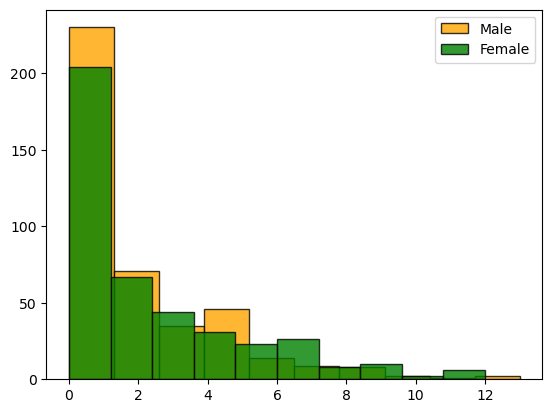

In [77]:
plt.hist(merged.loc[merged["sex"] == 1]["cbcl_anx_dep"], bins=10, edgecolor="black", color="orange", alpha=0.8) # red is male
plt.hist(merged.loc[merged["sex"] == 0]["cbcl_anx_dep"], bins=10, edgecolor="black", color="green", alpha = 0.8) # orange is female
plt.legend(["Male", "Female"])



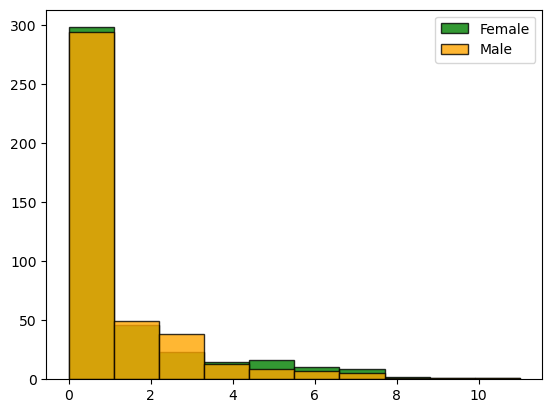

In [78]:
plt.hist(merged.loc[merged["sex"] == 0]["dsm5_scale1"], bins=10, edgecolor="black", color="green", alpha = 0.8) # orange is female
plt.hist(merged.loc[merged["sex"] == 1]["dsm5_scale1"], bins=10, edgecolor="black", color="orange", alpha=0.8) # red is male
plt.legend(["Female", "Male"])


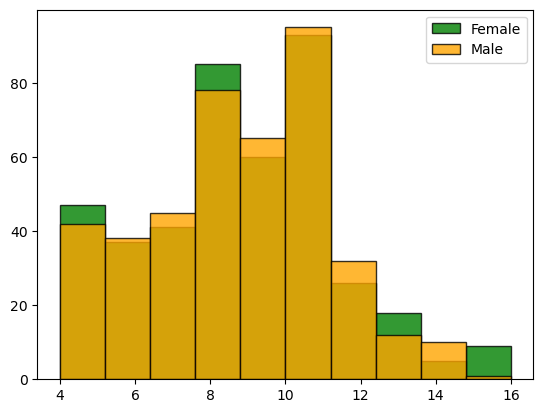

In [76]:
plt.hist(merged.loc[merged["sex"] == 0]["upps_neg"], bins=10, edgecolor="black", color="green", alpha = 0.8) # orange is female
plt.hist(merged.loc[merged["sex"] == 1]["upps_neg"], bins=10, edgecolor="black", color="orange", alpha=0.8) # red is male
plt.legend(["Female", "Male"])
